In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from adata_hf_datasets.utils import setup_logging

setup_logging()

<RootLogger root (INFO)>

In [4]:
import anndata

adata_path = "../data/demo/rna_seq.h5ad"
# adata = anndata.read_h5ad("../data/demo/rna_seq.h5ad")

In [40]:
from adata_hf_datasets.initial_embedder2 import InitialEmbedder

embedder = InitialEmbedder(method="scvi_fm")
embedder.prepare(adata_path=adata_path)
adata = embedder.embed(adata_path, batch_key="study", batch_size=20)

2025-03-19 16:36:20,719 - adata_hf_datasets.initial_embedder2 - INFO - Initialized InitialEmbedder with method=scvi_fm, embedding_dim=64. requires_full_adata=True
2025-03-19 16:36:20,720 - adata_hf_datasets.initial_embedder2 - INFO - Preparing method 'scvi_fm' with embedding_dim=64
2025-03-19 16:36:20,720 - adata_hf_datasets.initial_embedder2 - INFO - Preparing SCVI model, loading from S3 or HF if needed.
2025-03-19 16:36:20,720 - adata_hf_datasets.initial_embedder2 - INFO - Loading SCVI model from S3 bucket cellxgene-contrib-public, path models/scvi/2024-02-12/homo_sapiens/modelhub
2025-03-19 16:36:44,708 - adata_hf_datasets.initial_embedder2 - INFO - Reading reference adata from URL https://cellxgene-contrib-public.s3.amazonaws.com/models/scvi/2024-02-12/homo_sapiens/adata-spinal-cord-minified.h5ad
2025-03-19 16:36:44,952 - adata_hf_datasets.initial_embedder2 - INFO - Preparing SCVI model with reference data...


INFO     Loading model...                                                                                          
INFO     File ../models/scvi_cellxgene/model.pt already downloaded                                                 


/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/model/base/_base_model.py:692: UserWarning: `accelerator` has been automatically set to `cpu` although 'mps' exists. If you wish to run on mps backend, use explicitly accelerator=='mps' in train function.In future releases it will become default for mps supported machines.
  _, _, device = parse_device_args(
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/model/_scvi.py:159: UserWarning: This dataset has some empty cells, this might fail inference.Data should be filtered with `scanpy.pp.filter_cells()`
  library_log_means, library_log_vars = _init_library_size(
2025-03-19 16:36:45,530 - adata_hf_datasets.initial_embedder2 - INFO - Embedding data using method 'scvi_fm'. Output to '../data/demo/rna_seq_scvi_fm_emb.h5ad'. obsm_key=X_scvi_fm
2025-03-19 16:36:45,531 - adata_hf_datasets.initial_embedder2 - INFO - Using chunk-based approach for method 'scvi_fm'.
2025-03-19 16:36:45,54

INFO     Found 26.674999999999997% reference vars in query data.                                                   


/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/model/base/_archesmixin.py:211: UserWarning: Query data contains less than 80% of reference var names. This may result in poor performance.
  return _pad_and_sort_query_anndata(adata, var_names, inplace)
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/model/base/_archesmixin.py:85: UserWarning: `accelerator` has been automatically set to `cpu` although 'mps' exists. If you wish to run on mps backend, use explicitly accelerator=='mps' in train function.In future releases it will become default for mps supported machines.
  _, _, device = parse_device_args(
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/data/fields

INFO     Found 26.674999999999997% reference vars in query data.                                                   


/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/model/base/_archesmixin.py:211: UserWarning: Query data contains less than 80% of reference var names. This may result in poor performance.
  return _pad_and_sort_query_anndata(adata, var_names, inplace)
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/model/base/_archesmixin.py:85: UserWarning: `accelerator` has been automatically set to `cpu` although 'mps' exists. If you wish to run on mps backend, use explicitly accelerator=='mps' in train function.In future releases it will become default for mps supported machines.
  _, _, device = parse_device_args(
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/data/fields

INFO     Found 26.674999999999997% reference vars in query data.                                                   


/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/model/base/_archesmixin.py:211: UserWarning: Query data contains less than 80% of reference var names. This may result in poor performance.
  return _pad_and_sort_query_anndata(adata, var_names, inplace)
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/model/base/_archesmixin.py:85: UserWarning: `accelerator` has been automatically set to `cpu` although 'mps' exists. If you wish to run on mps backend, use explicitly accelerator=='mps' in train function.In future releases it will become default for mps supported machines.
  _, _, device = parse_device_args(
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/data/fields

INFO     Found 26.674999999999997% reference vars in query data.                                                   


/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/model/base/_archesmixin.py:211: UserWarning: Query data contains less than 80% of reference var names. This may result in poor performance.
  return _pad_and_sort_query_anndata(adata, var_names, inplace)
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/model/base/_archesmixin.py:85: UserWarning: `accelerator` has been automatically set to `cpu` although 'mps' exists. If you wish to run on mps backend, use explicitly accelerator=='mps' in train function.In future releases it will become default for mps supported machines.
  _, _, device = parse_device_args(
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/data/fields

INFO     Found 26.674999999999997% reference vars in query data.                                                   


/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/model/base/_archesmixin.py:211: UserWarning: Query data contains less than 80% of reference var names. This may result in poor performance.
  return _pad_and_sort_query_anndata(adata, var_names, inplace)
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/model/base/_archesmixin.py:85: UserWarning: `accelerator` has been automatically set to `cpu` although 'mps' exists. If you wish to run on mps backend, use explicitly accelerator=='mps' in train function.In future releases it will become default for mps supported machines.
  _, _, device = parse_device_args(
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/data/fields

INFO     Found 26.674999999999997% reference vars in query data.                                                   


/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/model/base/_archesmixin.py:211: UserWarning: Query data contains less than 80% of reference var names. This may result in poor performance.
  return _pad_and_sort_query_anndata(adata, var_names, inplace)
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/model/base/_archesmixin.py:85: UserWarning: `accelerator` has been automatically set to `cpu` although 'mps' exists. If you wish to run on mps backend, use explicitly accelerator=='mps' in train function.In future releases it will become default for mps supported machines.
  _, _, device = parse_device_args(
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/data/fields

INFO     Found 26.674999999999997% reference vars in query data.                                                   


/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/model/base/_archesmixin.py:211: UserWarning: Query data contains less than 80% of reference var names. This may result in poor performance.
  return _pad_and_sort_query_anndata(adata, var_names, inplace)
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/model/base/_archesmixin.py:85: UserWarning: `accelerator` has been automatically set to `cpu` although 'mps' exists. If you wish to run on mps backend, use explicitly accelerator=='mps' in train function.In future releases it will become default for mps supported machines.
  _, _, device = parse_device_args(
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/data/fields

INFO     Found 26.674999999999997% reference vars in query data.                                                   


/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/model/base/_archesmixin.py:211: UserWarning: Query data contains less than 80% of reference var names. This may result in poor performance.
  return _pad_and_sort_query_anndata(adata, var_names, inplace)
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/model/base/_archesmixin.py:85: UserWarning: `accelerator` has been automatically set to `cpu` although 'mps' exists. If you wish to run on mps backend, use explicitly accelerator=='mps' in train function.In future releases it will become default for mps supported machines.
  _, _, device = parse_device_args(
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/data/fields

INFO     Found 26.674999999999997% reference vars in query data.                                                   


/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/model/base/_archesmixin.py:211: UserWarning: Query data contains less than 80% of reference var names. This may result in poor performance.
  return _pad_and_sort_query_anndata(adata, var_names, inplace)
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/model/base/_archesmixin.py:85: UserWarning: `accelerator` has been automatically set to `cpu` although 'mps' exists. If you wish to run on mps backend, use explicitly accelerator=='mps' in train function.In future releases it will become default for mps supported machines.
  _, _, device = parse_device_args(
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/data/fields

INFO     Found 26.674999999999997% reference vars in query data.                                                   


/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/model/base/_archesmixin.py:211: UserWarning: Query data contains less than 80% of reference var names. This may result in poor performance.
  return _pad_and_sort_query_anndata(adata, var_names, inplace)
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/model/base/_archesmixin.py:85: UserWarning: `accelerator` has been automatically set to `cpu` although 'mps' exists. If you wish to run on mps backend, use explicitly accelerator=='mps' in train function.In future releases it will become default for mps supported machines.
  _, _, device = parse_device_args(
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/data/fields

OSError: Unable to create file (unable to truncate a file which is already open)

In [5]:
from adata_hf_datasets.pp import pp_geneformer

processed_path = "../data/RNA/processed/test/demo_data/all.h5ad"
pp_geneformer(infile=adata_path, outfile=processed_path, overwrite=True)

2025-03-19 15:04:34,723 - adata_hf_datasets.pp - INFO - Loading AnnData from ../data/demo/rna_seq.h5ad ...
2025-03-19 15:04:34,736 - adata_hf_datasets.pp - INFO - Adding 'ensembl_id' to adata.var.
2025-03-19 15:04:34,737 - adata_hf_datasets.pp - INFO - Gene symbols are exptected to be found in .var_names. An example gene symbol: ENSG00000000460
2025-03-19 15:04:34,737 - adata_hf_datasets.pp - INFO - Directly storing Ensembl IDs from row index in adata.var['ensembl_id'].
2025-03-19 15:04:34,737 - adata_hf_datasets.pp - INFO - Calculating n_counts, this requires scanning the data once.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
2025-03-19 15:04:34,859 - adata_hf_datasets.pp - INFO - Adding a stable sample_index to obs.
2025-03-19 15:04:34,860 - adata_hf_datasets.pp - INFO - Writing preprocessed AnnData to ../data/RNA/processed/test/demo_data/all.h5ad
2025-03-19 15:04:34,881 - adata_hf_datasets.pp - INFO - Preprocessing done. Preproces

In [6]:
adata = anndata.read_h5ad(processed_path)
adata

AnnData object with n_obs × n_vars = 200 × 10000
    obs: 'geo_id', 'sample_type', 'organism', 'study', 'treatment', 'natural_language_annotation', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_counts', 'sample_index'
    var: 'biotype', 'gene_name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'ensembl_id', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'hvg', 'log1p'
    obsm: 'natural_language_annotation_replicates'

In [11]:
from adata_hf_datasets.initial_embedder2 import InitialEmbedder

embedder = InitialEmbedder(method="geneformer")
embedder.prepare(adata_path=processed_path)
adata = embedder.embed(adata_path)

2025-03-19 15:13:00,505 - adata_hf_datasets.initial_embedder2 - INFO - Initialized GeneformerEmbedder with model_input_size=4096, num_layers=12, special_model=False
2025-03-19 15:13:00,505 - adata_hf_datasets.initial_embedder2 - INFO - Preparing method 'geneformer' with embedding_dim=64
2025-03-19 15:13:00,518 - adata_hf_datasets.initial_embedder2 - INFO - Tokenized geneformer dataset already exists at ../data/RNA/processed/test/demo_data/geneformer/geneformer.dataset. Skipping tokenization.
2025-03-19 15:13:00,519 - adata_hf_datasets.initial_embedder2 - INFO - Embedding data using method 'geneformer'. Storing in 'X_geneformer'.
2025-03-19 15:13:00,522 - adata_hf_datasets.initial_embedder2 - INFO - Extracting geneformer embeddings from model at /Users/mengerj/repos/adata_hf_datasets/external/Geneformer/gf-12L-95M-i4096...


  0%|          | 0/13 [00:00<?, ?it/s]

2025-03-19 15:13:22,093 - adata_hf_datasets.initial_embedder2 - INFO - Stored Geneformer embeddings of shape (200, 512) in adata.obsm['X_geneformer'].


## The previous approach: Problem was that fitting scvi on the training data and later on the inference data is neither coherent nor a use that aligns with a foundation model approach that is aimed for.

In [3]:
import anndata

adata = anndata.read_h5ad("../data/demo/rna_seq.h5ad")

In [69]:
from adata_hf_datasets.initial_embedder import InitialEmbedder

embedder = InitialEmbedder(method="scvi")
embedder.fit(adata, batch_key="study")
adata = embedder.embed(adata)

2025-02-11 13:36:08,947 - adata_hf_datasets.initial_embedder - INFO - Fitting method 'scvi' with embedding_dim=64
2025-02-11 13:36:08,947 - adata_hf_datasets.initial_embedder - INFO - Setting up scVI model with embedding_dim=64
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/data/fields/_dataframe_field.py:186: UserWarning: Category 0 in adata.obs['_scvi_batch'] has fewer than 3 cells. Models may not train properly.
  categorical_mapping = _make_column_categorical(
2025-02-11 13:36:08,979 - adata_hf_datasets.initial_embedder - INFO - Training scVI model.
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/train/_trainrunner.py:69: UserWarning: `accelerator` has been automatically se

Training:   0%|          | 0/10 [00:00<?, ?it/s]

/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].

In [70]:
adata.obsm["X_scvi"]

array([[ 0.0174264 ,  0.13381286,  0.2123419 , ..., -0.02693812,
        -0.5777042 , -0.19374533],
       [ 0.19993295, -0.33171532,  0.5399544 , ..., -1.2446675 ,
        -0.51235235, -0.26110113],
       [ 0.01079873, -0.02964801,  0.28322223, ..., -0.7336697 ,
        -0.85904235,  0.12404964],
       ...,
       [ 0.01999943, -1.40511   ,  1.8408469 , ..., -3.3454187 ,
        -1.9526563 ,  0.04684396],
       [-0.24815464,  0.2701683 ,  0.01768555, ..., -0.2796876 ,
        -0.95797986,  0.03571127],
       [-0.02856737, -0.51765317,  0.5305606 , ..., -1.3493755 ,
        -1.2734039 ,  0.3960248 ]], dtype=float32)

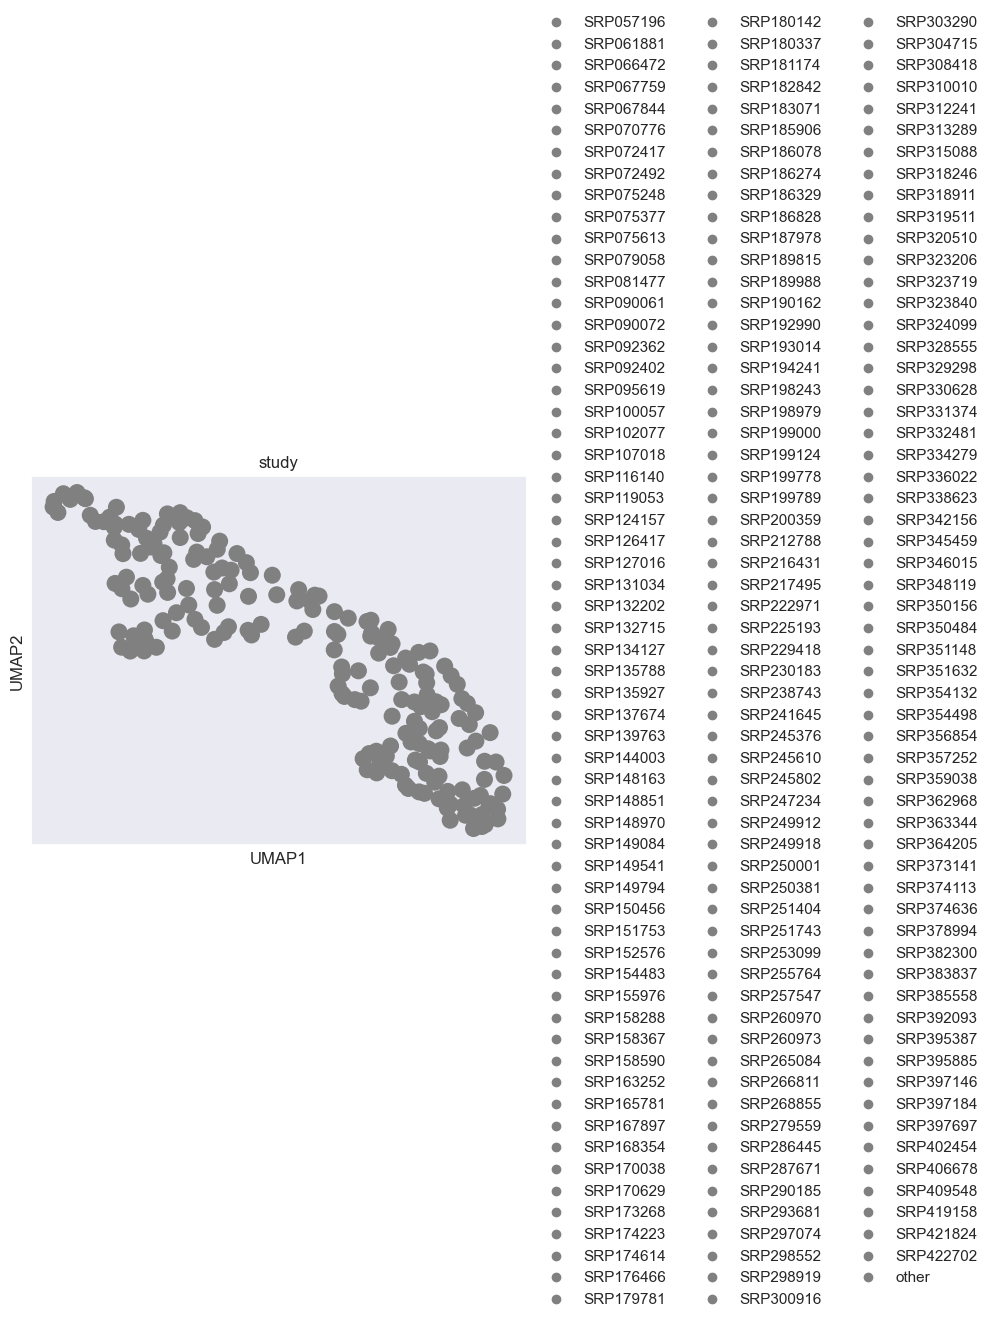

In [72]:
import scanpy as sc

sc.pp.neighbors(adata, use_rep="X_scvi")
sc.tl.umap(adata)
sc.pl.umap(adata, color="study")